In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

#1. Data Collection and Pre-processing
# Load data (replace with your actual file names)
df = pd.read_csv('4. HEADING.csv')

# Creating a DataFrame from the numpy array #splitting the dataset
X = df.drop(columns=['SPAD'])  # Drop 'sample_id' and 'SPAD' to get the features
y = df['SPAD']  # Target variable

print(df)
print (X)
print(y )

# Check for missing values
print(df.isnull().sum())


     500.075   500.336   500.597   500.858   501.119   501.381   501.642  \
0   3.067778  3.022222  2.916667  2.844444  2.882222  2.891111  2.930000   
1   3.082222  3.056667  2.962222  2.881111  2.906667  2.907778  2.936667   
2   2.508889  2.465556  2.336667  2.264444  2.296667  2.298889  2.322222   
3   3.277778  3.254444  3.171111  3.097778  3.140000  3.135556  3.152222   
4   3.532222  3.501111  3.415556  3.328889  3.353333  3.354444  3.366667   
..       ...       ...       ...       ...       ...       ...       ...   
94  2.265556  2.310000  2.287778  2.245556  2.254444  2.270000  2.324444   
95  2.882222  3.018889  3.163333  3.224444  3.201111  3.205556  3.327778   
96  3.565556  3.708889  3.847778  3.904444  3.887778  3.892222  4.010000   
97  3.218889  3.354444  3.498889  3.551111  3.523333  3.510000  3.632222   
98  3.143333  3.284444  3.428889  3.488889  3.470000  3.474444  3.590000   

     501.903   502.164   502.425  ...    948.856    949.094    949.333  \
0   2.995556 

In [2]:
#Explore data statistics
df.describe()

500.075    500.336    500.597    500.858    501.119    501.381  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean    5.200303   5.299456   5.337200   5.328098   5.285494   5.317598   
std     1.722373   1.760236   1.790926   1.796460   1.756843   1.773217   
min     2.265556   2.310000   2.287778   2.245556   2.254444   2.270000   
25%     3.550000   3.633889   3.648889   3.626667   3.618333   3.625000   
50%     5.393333   5.520000   5.536667   5.523333   5.510000   5.546667   
75%     6.401667   6.603333   6.718333   6.695000   6.536667   6.583333   
max     8.935000   9.120000   9.230000   9.200000   9.060000   9.125000   

         501.642    501.903    502.164    502.425  ...    948.856    949.094  \
count  99.000000  99.000000  99.000000  99.000000  ...  99.000000  99.000000   
mean    5.386756   5.408591   5.370045   5.382727  ...  34.414220  34.037918   
std     1.778712   1.751021   1.726114   1.752721  ...   8.178975   7.881947   
min     2.322222   2.381111   2.378889   2.348889  ...  21.360000  21.110000   
25%     3.701111   3.750556   3.737222   3.720000  ...  27.507778  27.547778   
50%     5.626667   5.653333   5.640000   5.660000  ...  32.680000  32.470000   
75%     6.680000   6.633333   6.578333   6.633333  ...  41.918333  41.001667   
max     9.220000   9.220000   9.130000   9.180000  ...  51.466667  50.456667   

         949.333    949.571    949.809    950.048    950.286    950.524  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean   34.162290  34.352761  34.239102  34.045892  34.142278  34.248535   
std     7.933940   8.166458   8.067249   7.856544   7.913977   8.100140   
min    21.090000  21.136667  21.073333  20.963333  21.043333  20.910000   
25%    27.664444  27.511111  27.473333  27.595000  27.591667  27.522778   
50%    32.566667  32.592222  32.524444  32.490000  32.600000  32.560000   
75%    41.293333  41.910000  41.738333  41.071667  41.296667  41.885000   
max    50.700000  51.420000  51.100000  50.493333  50.750000  51.223333   

         950.763       SPAD  
count  99.000000  99.000000  
mean   34.062609  36.203939  
std     7.927582   2.239843  
min    20.873333  30.900000  
25%    27.498889  34.550000  
50%    32.620000  36.300000  
75%    41.306667  37.950000  
max    50.713333  40.300000  

[8 rows x 1793 columns]

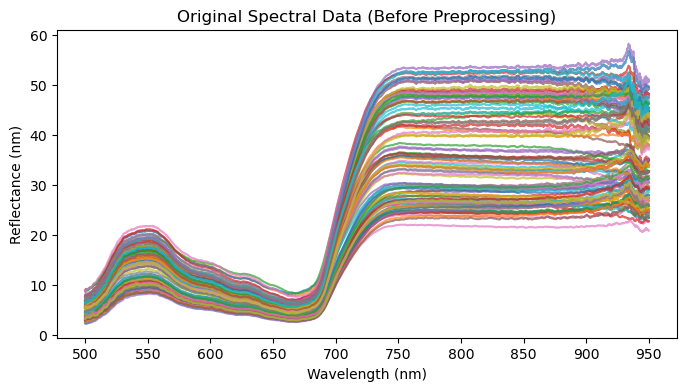

In [3]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_wavelengths = X.shape[1]  # Assuming the number of columns in X corresponds to the number of wavelengths

# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(X.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Original Spectral Data (Before Preprocessing)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()


In [4]:
# Step 1: Calculate Q1, Q3, and IQR for the spectral data
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers in the spectral data
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Step 3: Create a mask to identify rows with any outliers
outlier_mask = outliers.any(axis=1)

# Step 4: Calculate the absolute deviation from the IQR boundaries for ranking
deviation = np.maximum((Q1 - X).abs(), (X - Q3).abs())

# Apply the mask to get deviations only for the identified outliers
deviation = deviation[outlier_mask]

# Step 5: Sum deviations across features for each sample (to rank overall extremeness)
total_deviation = deviation.sum(axis=1)

# Step 6: Calculate the maximum number of outliers to remove (5% of the total data)
num_samples = len(X)
max_outliers_to_remove = int(0.05 * num_samples)

# Get indices of the top 5% most extreme outliers
top_outlier_indices = total_deviation.nlargest(max_outliers_to_remove).index

# Create a new outlier mask based on the top 5% of deviations
final_outlier_mask = pd.Series(False, index=X.index)
final_outlier_mask.loc[top_outlier_indices] = True

# Step 7: Remove the top 5% most extreme outliers
cleaned_spectral_data = X[~final_outlier_mask]
cleaned_spad_data = y[~final_outlier_mask]

# Step 8: Combine the cleaned spectral data and SPAD values back into a single DataFrame (if needed)
cleaned_df = pd.concat([cleaned_spectral_data, cleaned_spad_data], axis=1)

# Step 9: Display the results
print(f"Original dataset size: {X.shape[0]}")
print(f"Number of outliers removed: {final_outlier_mask.sum()}")
print(f"Cleaned dataset size: {cleaned_df.shape[0]}")
print(f"Cleaned spectral data size: {cleaned_spectral_data.shape[0]}")

Original dataset size: 99
Number of outliers removed: 0
Cleaned dataset size: 99
Cleaned spectral data size: 99


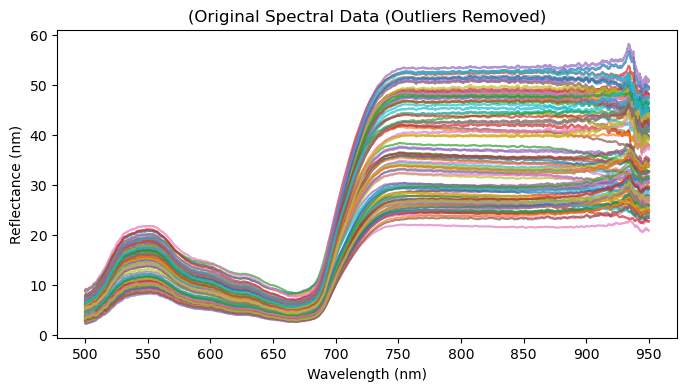

In [5]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = cleaned_spectral_data.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(cleaned_spectral_data.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('(Original Spectral Data (Outliers Removed)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

In [6]:
# Step 2: Calculate the correlation matrix for the combined DataFrame
correlation_matrix = cleaned_df.corr()

# Step 3: Extract correlations with the SPAD column (assuming the SPAD column is named 'SPAD')
correlations_with_spad = correlation_matrix['SPAD'].drop('SPAD')

# Step 4: Display the correlation values
print("Correlation values with SPAD:")
print(correlations_with_spad)

# Step 5: Sort correlations by absolute value to find strongest relationships
sorted_correlations = correlations_with_spad.abs().sort_values(ascending=False)
print("Top features correlated with SPAD:")
print(sorted_correlations.head(10))

# Step 6: Set a correlation threshold for feature selection
threshold = 0.5
mask = correlations_with_spad.abs() > threshold

# Step 7: Select features with a correlation higher than the threshold
selected_features = correlations_with_spad[mask].index
X_selected = cleaned_spectral_data[selected_features]


Correlation values with SPAD:
500.075   -0.619537
500.336   -0.618878
500.597   -0.619509
500.858   -0.620236
501.119   -0.623010
             ...   
949.809   -0.600007
950.048   -0.599159
950.286   -0.599101
950.524   -0.597311
950.763   -0.599354
Name: SPAD, Length: 1792, dtype: float64
Top features correlated with SPAD:
718.543    0.647635
718.796    0.647530
718.29     0.647524
717.53     0.647516
550.098    0.647437
717.784    0.647388
716.771    0.647360
716.517    0.647338
718.037    0.647316
719.556    0.647275
Name: SPAD, dtype: float64


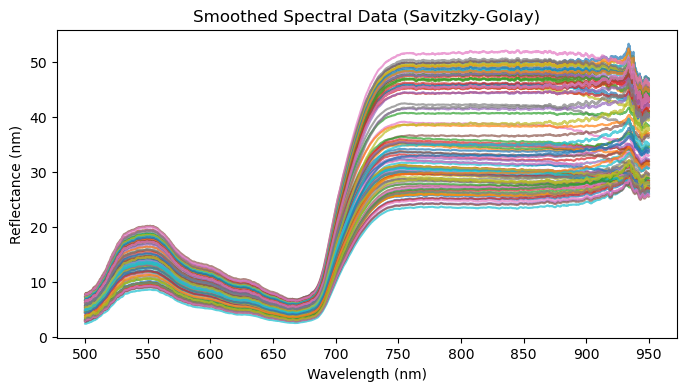

In [7]:
# Function to apply Savitzky-Golay smoothing
def savitzky_golay(cleaned_spectral_data, window_size=11, poly_order=2):
    return savgol_filter(cleaned_spectral_data, window_size, poly_order, axis=0)

# Apply Savitzky-Golay smoothing to X_selected
spectral_sgm = savitzky_golay(cleaned_spectral_data, window_size=11, poly_order=2)

# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = spectral_sgm.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(spectral_sgm.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Smoothed Spectral Data (Savitzky-Golay)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

Explained Variance Ratio: [9.87876042e-01 9.31508425e-03 2.44356156e-03 1.68009954e-04
 7.69168622e-05 4.88881921e-05 2.62205971e-05 1.25230403e-05
 9.46230196e-06 7.32579067e-06 5.52855064e-06 2.61500432e-06
 1.67734316e-06 1.09511578e-06 9.09297672e-07 6.51325103e-07
 5.60015630e-07 5.14116720e-07 3.81229831e-07 3.25695262e-07
 2.65087419e-07 2.31169896e-07 1.51666300e-07 1.35411890e-07
 1.23645045e-07 9.76713745e-08 8.37230543e-08 6.01365351e-08
 5.07367231e-08 4.40849865e-08 4.02662356e-08 3.74307363e-08
 3.08775815e-08 2.79414305e-08 2.52652808e-08 2.37946235e-08
 2.14690343e-08 2.02790636e-08 1.85679263e-08 1.76843058e-08
 1.55675330e-08 1.32662177e-08 1.26363485e-08 1.12563309e-08
 1.09277745e-08 9.77714091e-09 9.56245926e-09 8.71147529e-09
 8.07981758e-09 7.76439109e-09 7.09922379e-09 7.04409171e-09
 6.57556559e-09 5.93998338e-09 5.85968305e-09 5.22684984e-09
 5.01805103e-09 4.86119889e-09 4.53697523e-09 3.78799216e-09
 3.76624834e-09 3.18658985e-09 2.97143437e-09 2.84853791e-0

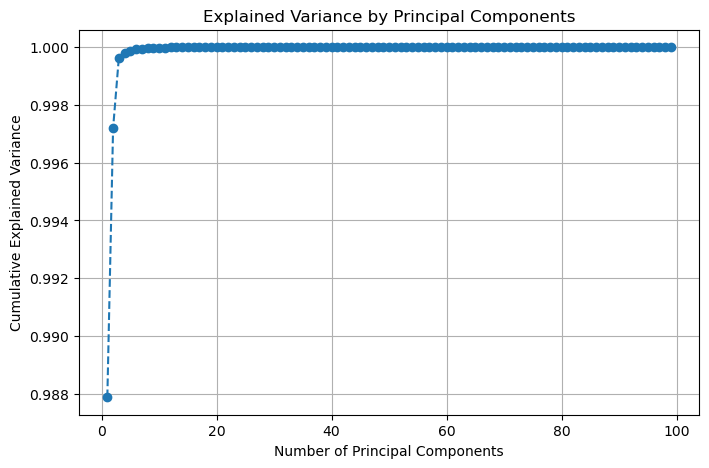

          PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0 -310.086058 -21.618608   7.663967  0.964527 -5.117970  0.066146 -0.380192   
1 -305.158384 -24.811912  -0.997141  2.531348 -3.466868 -0.485938 -0.815365   
2 -298.220523 -26.859404  -7.600716  3.581349 -2.111253 -0.820540 -1.126803   
3 -289.272474 -27.761085 -12.146758  4.114531 -1.051127 -0.937662 -1.314505   
4 -278.314236 -27.516954 -14.635266  4.130892 -0.286489 -0.837301 -1.378471   

        PC8       PC9      PC10  ...      PC90      PC91      PC92  \
0 -3.056603  0.216493  1.879954  ... -0.001249 -0.000819  0.003509   
1 -2.337499  0.091129  0.920590  ...  0.000599  0.000337 -0.001457   
2 -1.677022 -0.022374  0.159210  ...  0.001364  0.000859 -0.003669   
3 -1.075171 -0.124015 -0.404185  ...  0.001047  0.000748 -0.003127   
4 -0.531947 -0.213794 -0.769594  ... -0.000351  0.000004  0.000168   

           PC93          PC94          PC95          PC96          PC97  \
0 -5.494479e-14 -8.812450e-13

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Step 2: Initialize and apply PCA
pca = PCA(n_components=None)  # Set to None to keep all components
pca_result = pca.fit_transform(spectral_sgm)

# Step 3: Analyze explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 4: Output results
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Step 5: Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

# Display first few rows of PCA-transformed data
print(pca_df.head())

In [9]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result,cleaned_spad_data, test_size=0.20, random_state=175)

In [10]:
# RFE (Recursive Feature Elimination) using RandomForestRegressor
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=20, step=25)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Print selected features and their rankings
selected_features = rfe.support_
feature_ranking = rfe.ranking_
print("Selected features (RFE):", selected_features)
print("Feature ranking (RFE):", feature_ranking)
# Display the selected features
print(f"Number of features selected by RFE: {len(selected_features)}")


Selected features (RFE): [ True  True  True  True False False False False  True False False  True
  True  True  True  True False False False False False  True False False
 False False False False False  True False False  True False False False
 False False False False False  True False False False False False False
  True False False False  True False  True False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False  True False  True False False False False False False
 False False False]
Feature ranking (RFE): [1 1 1 1 3 3 3 3 1 4 4 1 1 1 1 1 3 3 5 5 4 1 5 5 3 2 4 4 3 1 3 4 1 4 5 4 5
 4 4 5 5 1 3 5 3 4 5 2 1 4 4 3 1 5 1 3 4 3 3 4 4 5 5 5 4 1 4 4 5 2 2 3 4 3
 4 3 5 4 3 5 3 3 3 4 5 4 3 1 3 1 4 3 5 5 5 5 5 5 5]
Number of features selected by RFE: 99


In [11]:
from scipy.stats import pearsonr

# Function to calculate vegetation indices
def calculate_indices(X_train_rfe, wavelengths):
    """
    Calculate various vegetation indices based on spectral data.

    Parameters:
    spectral_sgm: numpy array (samples x wavelengths)
    wavelengths: numpy array of corresponding wavelengths (same length as spectral_sgm columns)

    Returns:
    indices_df: DataFrame of calculated indices
    """
    # Define wavelength ranges for each band
    green_band = np.mean(spectral_sgm[:, (wavelengths >= 500) & (wavelengths <= 600)], axis=1)
    red_band = np.mean(spectral_sgm[:, (wavelengths >= 600) & (wavelengths <= 700)], axis=1)
    nir_band = np.mean(spectral_sgm[:, (wavelengths >= 750) & (wavelengths <= 950)], axis=1)
    red_edge_band = np.mean(spectral_sgm[:, (wavelengths >= 700) & (wavelengths <= 750)], axis=1)

    # Calculate vegetation indices
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    savi = 1.5 * (nir_band - red_band) / (nir_band + red_band + 0.5)
    msavi = (2 * nir_band + 1 - np.sqrt((2 * nir_band + 1)**2 - 8 * (nir_band - red_band))) / 2
    gndvi = (nir_band - green_band) / (nir_band + green_band)
    rvi = nir_band / red_band
    tvi = 0.5 * (120 * (nir_band - green_band) - 200 * (red_band - green_band))
    rdvi = (nir_band - red_band) / np.sqrt(nir_band + red_band)
    osavi = (nir_band - red_band) / (nir_band + red_band + 0.16)
    sr = nir_band / red_band
    mtvi = 1.5 * ((1.2 * (nir_band - green_band)) - (2.5 * (red_band - green_band)))
    cigreen = (nir_band / green_band) - 1
    msr = (nir_band / red_band - 1) / np.sqrt(nir_band / red_band + 1)
    cire = (nir_band / red_edge_band) - 1
    rev = red_edge_band / nir_band

    # Store all indices in a DataFrame
    indices_df = pd.DataFrame({
        "R": red_band,
        "G": green_band,
        "NIR": nir_band,
        "RedEdge": red_edge_band,
        "NDVI": ndvi,
        "SAVI": savi,
        "MSAVI": msavi,
        "GNDVI": gndvi,
        "RVI": rvi,
        "TVI": tvi,
        "RDVI": rdvi,
        "OSAVI": osavi,
        "SR": sr,
        "MTVI": mtvi,
        "CIgreen": cigreen,
        "MSR": msr,
        "CIre": cire,
        "REV": rev
    })
    return indices_df

# Function to calculate correlation coefficients
def calculate_correlations(indices_df, cleaned_spad_data):
    """
    Calculate correlation coefficients between vegetation indices and cleaned SPAD data.

    Parameters:
    indices_df: DataFrame of vegetation indices
    cleaned_spad_data: numpy array of SPAD values

    Returns:
    correlation_df: DataFrame of correlation coefficients and p-values
    """
    correlations = []
    for index_name in indices_df.columns:
        corr, p_value = pearsonr(indices_df[index_name], cleaned_spad_data)
        correlations.append({"Index": index_name, "Correlation": corr, "P-Value": p_value})
    
    correlation_df = pd.DataFrame(correlations)
    return correlation_df

# Define wavelengths to match the number of columns in spectral_sgm
num_wavelengths = spectral_sgm.shape[1]
wavelengths = np.linspace(500, 950, num_wavelengths)  # Define wavelengths

# Step 1: Calculate vegetation indices
indices_df = calculate_indices(spectral_sgm, wavelengths)

# Step 2: Calculate correlations
cleaned_spad_data = np.array(cleaned_spad_data)  # Assuming SPAD values are in a numpy array
correlation_df = calculate_correlations(indices_df, cleaned_spad_data)

# Step 3: Filter significant correlations
significant_correlations = correlation_df[correlation_df["P-Value"] < 0.05]

# Output results
print("All Correlations:")
print(correlation_df)
print("\nSignificant Correlations:")
print(significant_correlations)

All Correlations:
      Index  Correlation       P-Value
0         R    -0.627856  3.515197e-12
1         G    -0.636706  1.404044e-12
2       NIR    -0.621575  6.625183e-12
3   RedEdge    -0.638720  1.134675e-12
4      NDVI     0.118044  2.445553e-01
5      SAVI     0.071471  4.820585e-01
6     MSAVI     0.096068  3.441939e-01
7     GNDVI     0.121150  2.322721e-01
8       RVI     0.142636  1.590143e-01
9       TVI    -0.615314  1.228900e-11
10     RDVI    -0.576899  4.111098e-10
11    OSAVI     0.103182  3.094751e-01
12       SR     0.142636  1.590143e-01
13     MTVI    -0.618564  8.932384e-12
14  CIgreen     0.140163  1.664399e-01
15      MSR     0.133467  1.878346e-01
16     CIre     0.138861  1.704515e-01
17      REV    -0.120501  2.348025e-01

Significant Correlations:
      Index  Correlation       P-Value
0         R    -0.627856  3.515197e-12
1         G    -0.636706  1.404044e-12
2       NIR    -0.621575  6.625183e-12
3   RedEdge    -0.638720  1.134675e-12
9       TVI    -0.6

In [39]:
# Define parameter grids for RandomizedSearchCV
# Parameter grid for RandomizedSearchCV
n_estimators = np.arange(2, 100, 3)
max_depth = np.arange(2, 50, 3)
min_samples_split = np.arange(2, 60, 5)
min_samples_leaf = np.arange(4, 50,5)
min_impurity_decrease = np.linspace(0, 0.1, 2)
# Adding max_features and min_impurity_decrease to help control complexity
param_dist_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,  # Helps reduce overfitting
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
   
}
# Initialize models
model_rf = RandomForestRegressor(random_state=175)

# Perform RandomizedSearchCV for each model
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist_rf, n_iter=175, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_rf.fit(X_train_rfe, y_train)
best_rf = random_search_rf.best_estimator_
best_params_rf = random_search_rf.best_params_
print("Best parameters for Random Forest: ", best_params_rf)
# Cross-validation with the best hyperparameters for each model
mse_scores_rf = cross_val_score(best_rf, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_rf = -mse_scores_rf
average_mse_rf = np.mean(mse_scores_rf)

# Print cross-validation results
print(f"Average MSE for Random Forest: {average_mse_rf}")

# Evaluate the individual models
models = {
    "RandomForest": best_rf
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for Random Forest:  {'n_estimators': 11, 'min_samples_split': 12, 'min_samples_leaf': 9, 'min_impurity_decrease': 0.1, 'max_features': 'auto', 'max_depth': 14, 'bootstrap': True}
Average MSE for Random Forest: 3.2374653197728316
Evaluating RandomForest model...
Training Metrics:
                 MAE       MSE   Pearson        R2      RMSE       RPD
RandomForest  1.1206  1.966708  0.800604  0.607477  1.402394  1.596127

Testing Metrics:
                   MAE       MSE  Pearson        R2      RMSE       RPD
RandomForest  1.209947  2.307506  0.75338  0.515593  1.519048  1.436796


In [13]:
import matplotlib.pyplot as plt

# Assuming these are your actual and predicted SPAD values for both training and testing sets
y_train_actual = y_train # Replace with your actual training SPAD values
y_train_predicted = y_train_pred # Replace with your predicted SPAD values from the model (training)

y_test_actual = y_test  # Replace with your actual testing SPAD values
y_test_predicted = y_test_pred  # Replace with your predicted SPAD values from the model (testing)

# Combined Plot
plt.figure(figsize=(6, 4))

# Scatter plot for Training Data (circles)
plt.scatter(y_train_actual, y_train_predicted, color='blue', alpha=0.6, s=10, marker='o', label='Training Data')

# Scatter plot for Testing Data (squares)
plt.scatter(y_test_actual, y_test_predicted, color='green', alpha=0.6, s=10, marker='s', label='Testing Data')

# Plot the 1:1 line (perfect prediction)
plt.plot([min(min(y_train_actual), min(y_test_actual)), max(max(y_train_actual), max(y_test_actual))],
         [min(min(y_train_predicted), min(y_test_predicted)), max(max(y_train_predicted), max(y_test_predicted))],
         color='red', linestyle='--', label='1:1 Line')

# Labels and title
plt.xlabel('Actual SPAD Values', fontsize=10)
plt.ylabel('Predicted SPAD Values', fontsize=10)
plt.title('Scatter Plot: Actual vs Predicted SPAD Values (Training and Testing Data)', fontsize=12)

# Add legend
plt.legend()

# Remove grid and display plot
plt.show()



In [45]:
# Define parameter grids for RandomizedSearchCV
n_estimators = np.arange(2, 150,5)
learning_rate = np.arange(0.001, 1, 0.1)
max_depth = np.arange(2, 50, 1)
subsample = np.arange(0.01, 1.0, 0.1) 
colsample_bytree = np.arange(0.2, 1.0, 0.1)

# Additional hyperparameters to help control model complexity
gamma = np.arange(0, 0.5, 0.05)  # Regularization term to reduce overfitting
reg_lambda = np.arange(0.6, 1.0, 0.6)  # L2 regularization
reg_alpha = np.arange(0.5, 1.0, 0.6)  # L1 regularization

param_dist_xgb = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'gamma': gamma,  # Regularization parameters
    'reg_lambda': reg_lambda,
    'reg_alpha': reg_alpha
}
# Initialize models
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=175)
# Perform RandomizedSearchCV for each model
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_dist_xgb, n_iter=175, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_xgb.fit(X_train_rfe, y_train)
best_xgb = random_search_xgb.best_estimator_
best_params_xgb = random_search_xgb.best_params_
print("Best parameters for XGBoost: ", best_params_xgb)
# Cross-validation with the best hyperparameters for each model
mse_scores_xgb = cross_val_score(best_xgb, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_xgb = -mse_scores_xgb
average_mse_xgb = np.mean(mse_scores_xgb)
# Print cross-validation results
print(f"Average MSE for XGBoost: {average_mse_xgb}")


# Evaluate the individual models
models = {
      "XGBoost": best_xgb
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for XGBoost:  {'subsample': 0.51, 'reg_lambda': 0.6, 'reg_alpha': 0.5, 'n_estimators': 87, 'max_depth': 13, 'learning_rate': 0.101, 'gamma': 0.45, 'colsample_bytree': 0.9000000000000001}
Average MSE for XGBoost: 2.709444792125908
Evaluating XGBoost model...
Training Metrics:
              MAE       MSE   Pearson        R2      RMSE      RPD
XGBoost  0.249923  0.109595  0.991816  0.978127  0.331051  6.76148

Testing Metrics:
              MAE       MSE   Pearson        R2      RMSE       RPD
XGBoost  1.166107  2.042338  0.790568  0.571259  1.429104  1.527223


In [32]:
# Define parameter grids for RandomizedSearchCV
n_estimators = np.arange(2,150,3)
learning_rate = np.arange(0.01, 1, 0.1)
max_depth = np.arange(2, 50,5)

param_dist_gb = {
   'n_estimators': n_estimators,
   'learning_rate': learning_rate,
   'max_depth': max_depth
}

# Initialize models
model_gb = GradientBoostingRegressor(random_state=175)

# Perform RandomizedSearchCV for each model
random_search_gb = RandomizedSearchCV(model_gb, param_distributions=param_dist_gb, n_iter=48, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_gb.fit(X_train_rfe, y_train)
best_gb = random_search_gb.best_estimator_
best_params_gb = random_search_gb.best_params_
print("Best parameters for Gradient Boosting: ", best_params_gb)
# Cross-validation with the best hyperparameters for each model
mse_scores_gb = cross_val_score(best_gb, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_gb = -mse_scores_gb
average_mse_gb = np.mean(mse_scores_gb)
# Print cross-validation results
print(f"Average MSE for Gradient Boosting: {average_mse_gb}")
# Evaluate the individual models
models = {
    "GradientBoosting": best_gb
    }
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for Gradient Boosting:  {'n_estimators': 17, 'max_depth': 2, 'learning_rate': 0.21000000000000002}
Average MSE for Gradient Boosting: 2.9316739713256914
Evaluating GradientBoosting model...
Training Metrics:
                       MAE     MSE   Pearson        R2      RMSE       RPD
GradientBoosting  0.619011  0.5618  0.962754  0.887874  0.749533  2.986391

Testing Metrics:
                       MAE       MSE   Pearson        R2      RMSE       RPD
GradientBoosting  1.264303  2.674475  0.666001  0.438557  1.635382  1.334588


In [16]:
# Define parameter grids for RandomizedSearchCV
C = np.arange(0.2, 8, 0.7)
epsilon = np.arange(1, 80, 2)

param_dist_svr = {
    'C': C,
    'epsilon': epsilon,
    'kernel': ['linear', 'rbf']
}
# Initialize models
model_svr = SVR()
# Perform RandomizedSearchCV for each model
random_search_svr = RandomizedSearchCV(model_svr, param_distributions=param_dist_svr, n_iter=150, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_svr.fit(X_train_rfe, y_train)
best_svr = random_search_svr.best_estimator_
best_params_svr = random_search_svr.best_params_
print("Best parameters for SVR: ", best_params_svr)
# Cross-validation with the best hyperparameters for each model
mse_scores_svr = cross_val_score(best_svr, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_svr = -mse_scores_svr
average_mse_svr = np.mean(mse_scores_svr)
# Print cross-validation results
print(f"Average MSE for SVR: {average_mse_svr}")
# Evaluate the individual models
models = {
    "SVR": best_svr
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Best parameters for SVR:  {'kernel': 'linear', 'epsilon': 1, 'C': 1.5999999999999999}
Average MSE for SVR: 3.0679807309910365
Evaluating SVR model...
Training Metrics:
          MAE       MSE   Pearson        R2      RMSE       RPD
SVR  1.185564  2.114761  0.767415  0.577928  1.454222  1.539241

Testing Metrics:
          MAE       MSE   Pearson        R2      RMSE       RPD
SVR  0.960994  1.610664  0.840521  0.661879  1.269119  1.719744


In [17]:
# Define parameter grids for RandomizedSearchCV
alpha = np.logspace(-1, 80, 1)  # Range from 0.001 to 100
l1_ratio = np.linspace(0.1, 1, 100)  # More granular search for l1 ratio

param_dist_elnet = {
    'alpha': alpha,
    'l1_ratio': l1_ratio
}
# Initialize models
model_elnet = ElasticNet(random_state=175) 
# Perform RandomizedSearchCV for each model
random_search_elnet = RandomizedSearchCV(model_elnet, param_distributions=param_dist_elnet, n_iter=25, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_elnet.fit(X_train_rfe, y_train)
best_elnet = random_search_elnet.best_estimator_
best_params_elnet = random_search_elnet.best_params_
print("Best parameters for Elastic Net: ", best_params_elnet)
# Cross-validation with the best hyperparameters for each model
mse_scores_elnet = cross_val_score(best_elnet, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_elnet = -mse_scores_elnet
average_mse_elnet = np.mean(mse_scores_elnet)
# Print cross-validation results
print(f"Average MSE for Elastic Net: {average_mse_elnet}")
# Evaluate the individual models
models = {
    "ElasticNet": best_elnet
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Best parameters for Elastic Net:  {'l1_ratio': 0.1, 'alpha': 0.1}
Average MSE for Elastic Net: 3.0192004772381935
Evaluating ElasticNet model...
Training Metrics:
                 MAE       MSE   Pearson        R2      RMSE       RPD
ElasticNet  1.233025  2.329963  0.734453  0.534977  1.526422  1.466435

Testing Metrics:
                 MAE       MSE   Pearson        R2      RMSE       RPD
ElasticNet  1.138137  1.845595  0.792291  0.612561  1.358527  1.606565


In [18]:
# Define parameter grids for RandomizedSearchCV

# Initialize models
model_plsr = PLSRegression(n_components=2) 

# Perform RandomizedSearchCV for each model
# PLSR does not require hyperparameter tuning here
best_plsr = model_plsr
best_plsr.fit(X_train_rfe, y_train)
# Cross-validation with the best hyperparameters for each model

mse_scores_plsr = cross_val_score(best_plsr, X_train_rfe, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_plsr = -mse_scores_plsr
average_mse_plsr = np.mean(mse_scores_plsr)
# Print cross-validation results
print(f"Average MSE for PLSR: {average_mse_plsr}")
# Evaluate the individual models
models = {
    "PLSR": best_plsr
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_rfe, y_train)
    
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Average MSE for PLSR: 3.430031922122729
Evaluating PLSR model...
Training Metrics:
           MAE       MSE   Pearson        R2      RMSE       RPD
PLSR  1.031599  1.722014  0.810132  0.656314  1.312255  1.705764

Testing Metrics:
           MAE       MSE   Pearson        R2      RMSE       RPD
PLSR  1.130401  1.895172  0.795621  0.602153  1.376652  1.585412


In [19]:
# Ensemble the models using Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('gb', best_gb),
    ('svr', best_svr),
    ('elnet', best_elnet)
])

ensemble_model.fit(X_train_rfe, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_rfe)

# Evaluate the ensemble model
ensemble_metrics_train = calculate_metrics(y_train, ensemble_model.predict(X_train_rfe))
ensemble_metrics_test = calculate_metrics(y_test, y_ensemble_pred)
print("\nEnsemble Model Training Metrics:")
print(pd.DataFrame(ensemble_metrics_train, index=["Ensemble"]).T)
print("\nEnsemble Model Testing Metrics:")
print(pd.DataFrame(ensemble_metrics_test, index=["Ensemble"]).T)


Ensemble Model Training Metrics:
         Ensemble
MSE      0.862413
RMSE     0.928662
MAE      0.751246
R2       0.827876
RPD      2.410348
Pearson  0.941863

Ensemble Model Testing Metrics:
         Ensemble
MSE      2.105219
RMSE     1.450937
MAE      1.128272
R2       0.558059
RPD      1.504242
Pearson  0.797439


In [20]:
# Ensemble the models using Voting Regressor # 2 the best model ensembled
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
])

ensemble_model.fit(X_train_rfe, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_rfe)

# Evaluate the ensemble model
ensemble_metrics_train = calculate_metrics(y_train, ensemble_model.predict(X_train_rfe))
ensemble_metrics_test = calculate_metrics(y_test, y_ensemble_pred)
print("\nEnsemble Model Training Metrics:")
print(pd.DataFrame(ensemble_metrics_train, index=["Ensemble"]).T)
print("\nEnsemble Model Testing Metrics:")
print(pd.DataFrame(ensemble_metrics_test, index=["Ensemble"]).T)


Ensemble Model Training Metrics:
         Ensemble
MSE      0.484311
RMSE     0.695925
MAE      0.547039
R2       0.903339
RPD      3.216437
Pearson  0.973691

Ensemble Model Testing Metrics:
         Ensemble
MSE      2.178756
RMSE     1.476061
MAE      1.152243
R2       0.542621
RPD      1.478639
Pearson  0.815717
